In [1]:
# Maternal Mortality Capstone: Race, Economics, and Climate

#This notebook extends the previous MMR visualizations by:
##Analyzing racial and ethnic disparities in maternal mortality (IHME data)
##Linking global MMR to economic indicators (World Bank GDP & income group)
##Linking national maternal mortality to climate variables (NOAA, monthly)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [55]:
vsrr_path   = '/Users/aysia/Downloads/capstone/VSRR_Provisional_Maternal_Death_Counts_and_Rates.csv'
ihme_path   = '/Users/aysia/Downloads/capstone/IHME_USA_MMR_STATE_RACE_ETHN_1999_2019_DATA/IHME_USA_MMR_STATE_RACE_ETHN_1999_2019_ESTIMATES_COLLAPSED_Y2023M07D03.CSV'
who_mmr_path = '/Users/aysia/Downloads/capstone/AC597B1_ALL_LATEST.csv'

In [56]:
gdp_path    = '/Users/aysia/Downloads/capstone/worldbank gdp per capita/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv'
income_path = '/Users/aysia/Downloads/capstone/worldbank income groups.csv'
climate_path = "noaa_us_national_climate_monthly.csv"


In [57]:
vsrr      = pd.read_csv(vsrr_path)
ihme_full = pd.read_csv(ihme_path)
who_mmr   = pd.read_csv(who_mmr_path)


In [58]:
print("VSRR shape:", vsrr.shape)
print("IHME shape:", ihme_full.shape)
print("WHO MMR shape:", who_mmr.shape)

VSRR shape: (750, 12)
IHME shape: (510, 15)
WHO MMR shape: (7878, 14)


In [8]:
vsrr.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,07/06/2025,United States,Total,Total,2019,1,12 month-ending,01/31/2019,660.0,3787776,17.4,NaN
1,07/06/2025,United States,Total,Total,2019,2,12 month-ending,02/28/2019,653.0,3783489,17.3,NaN
2,07/06/2025,United States,Total,Total,2019,3,12 month-ending,03/31/2019,657.0,3771682,17.4,NaN
3,07/06/2025,United States,Total,Total,2019,4,12 month-ending,04/30/2019,668.0,3772235,17.7,NaN
4,07/06/2025,United States,Total,Total,2019,5,12 month-ending,05/31/2019,706.0,3767999,18.7,NaN


In [27]:
ihme_full.columns


Index(['measure_id', 'measure_name', 'location_id', 'location_name',
       'race_group', 'sex_id', 'sex_name', 'age_group_id', 'age_group_name',
       'year_id', 'metric_id', 'metric_name', 'val', 'upper', 'lower'],
      dtype='object')

In [28]:
ihme_full.head()


,measure_id,measure_name,location_id,location_name,race_group,sex_id,sex_name,age_group_id,age_group_name,year_id,metric_id,metric_name,val,upper,lower
0,25,Maternal mortality ratio,523,Alabama,Hispanic and any race,2,Female,169,10 to 54,1999-2009,3,Rate,8.670167,10.431584,7.208661
1,25,Maternal mortality ratio,523,Alabama,Non-Hispanic American Indian and Alaska Native,2,Female,169,10 to 54,1999-2009,3,Rate,44.801778,54.611601,36.494983
2,25,Maternal mortality ratio,523,Alabama,"Non-Hispanic Asian, Native Hawaiian, or Other ...",2,Female,169,10 to 54,1999-2009,3,Rate,17.974547,22.000261,14.755891
3,25,Maternal mortality ratio,523,Alabama,Non-Hispanic Black,2,Female,169,10 to 54,1999-2009,3,Rate,35.899357,41.899976,30.147046
4,25,Maternal mortality ratio,523,Alabama,Non-Hispanic White,2,Female,169,10 to 54,1999-2009,3,Rate,13.611288,16.787614,11.158495


In [40]:
import numpy as np

# Filter to females of reproductive age and rate metric
ihme_clean = ihme_full.query(
    "sex_name == 'Female' and age_group_name == '10 to 54' and metric_name == 'Rate'"
).copy()

# year_id is a period string like '1999-2009' or '2010-2019'
ihme_clean["period"] = ihme_clean["year_id"].astype(str).str.strip()

# starting year of the period (1999, 2010, etc.)
ihme_clean["period_start"] = ihme_clean["period"].str[:4].astype(int)

# midpoint year just for plotting on the x-axis
ihme_clean["period_mid"] = ihme_clean["period_start"] + 5

print("Shape:", ihme_clean.shape)
print("Unique periods:", ihme_clean["period"].unique())
print(ihme_clean[["year_id", "period", "period_start", "period_mid"]].head())


Shape: (510, 19)
Unique periods: ['1999-2009' '2010-2019']
     year_id     period  period_start  period_mid
0  1999-2009  1999-2009          1999        2004
1  1999-2009  1999-2009          1999        2004
2  1999-2009  1999-2009          1999        2004
3  1999-2009  1999-2009          1999        2004
4  1999-2009  1999-2009          1999        2004


In [41]:
#race summary table
race_summary = (
    ihme_clean
    .groupby("race_group")["val"]
    .agg(["count", "mean", "min", "max"])
    .sort_values("mean", ascending=False)
    .round(2)
)

race_summary


,count,mean,min,max
race_group,,,,
Non-Hispanic Black,102,44.77,22.39,109.92
Non-Hispanic American Indian and Alaska Native,102,35.03,9.33,88.74
Non-Hispanic White,102,20.44,9.77,43.86
"Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander",102,18.48,10.08,32.96
Hispanic and any race,102,16.46,7.85,38.05


In [42]:
race_period = (
    ihme_clean
    .groupby(["period", "period_mid", "race_group"])["val"]
    .mean()
    .reset_index()
    .sort_values(["race_group", "period_mid"])
)

race_period.head()


,period,period_mid,race_group,val
0,1999-2009,2004,Hispanic and any race,13.110576
5,2010-2019,2015,Hispanic and any race,19.808103
1,1999-2009,2004,Non-Hispanic American Indian and Alaska Native,23.714281
6,2010-2019,2015,Non-Hispanic American Indian and Alaska Native,46.345886
2,1999-2009,2004,"Non-Hispanic Asian, Native Hawaiian, or Other ...",14.936442


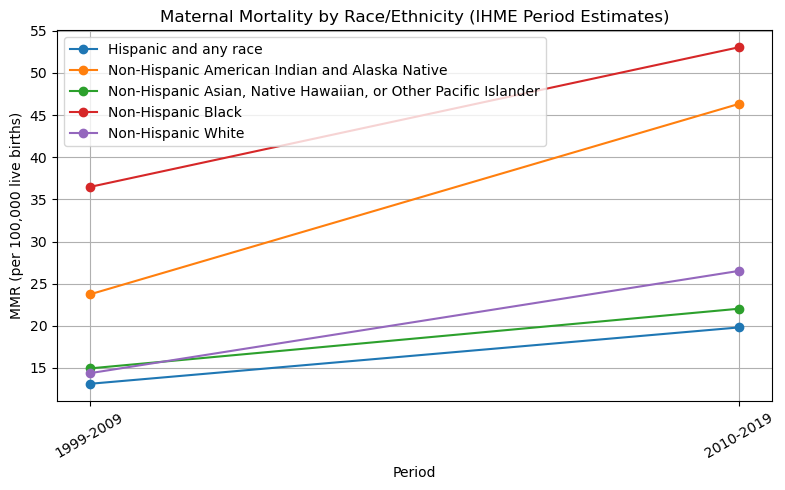

In [ ]:
import matplotlib.pyplot as plt
#national MMR over time by race
plt.figure(figsize=(8,5))

for race, g in race_period.groupby("race_group"):
    plt.plot(g["period_mid"], g["val"], marker="o", label=race)

# Show the text periods ('1999-2009', '2010-2019') on the x-axis
plt.xticks(
    ticks=race_period["period_mid"].unique(),
    labels=race_period["period"].unique(),
    rotation=30
)

plt.xlabel("Period")
plt.ylabel("MMR (per 100,000 live births)")
plt.title("Maternal Mortality by Race/Ethnicity (IHME Period Estimates)")
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
# state vs race heatmap
latest_period = ihme_clean["period"].max()   # should be '2010-2019'
print("Using period:", latest_period)

ihme_latest = ihme_clean[ihme_clean["period"] == latest_period].copy()

pivot_state_race = (
    ihme_latest
    .groupby(["location_name", "race_group"])["val"]
    .mean()
    .reset_index()
    .pivot(index="location_name", columns="race_group", values="val")
)

pivot_state_race.head()


Using period: 2010-2019


race_group,Hispanic and any race,Non-Hispanic American Indian and Alaska Native,"Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander",Non-Hispanic Black,Non-Hispanic White
location_name,,,,,
Alabama,16.006595,79.419467,28.334292,66.535786,31.837196
Alaska,16.495284,24.431676,15.185758,32.975892,17.385477
Arizona,19.691012,40.335002,20.576158,44.115013,23.945328
Arkansas,20.318758,43.973062,20.928125,71.039160,35.800276
California,15.545652,35.826385,17.033289,55.391044,18.647817


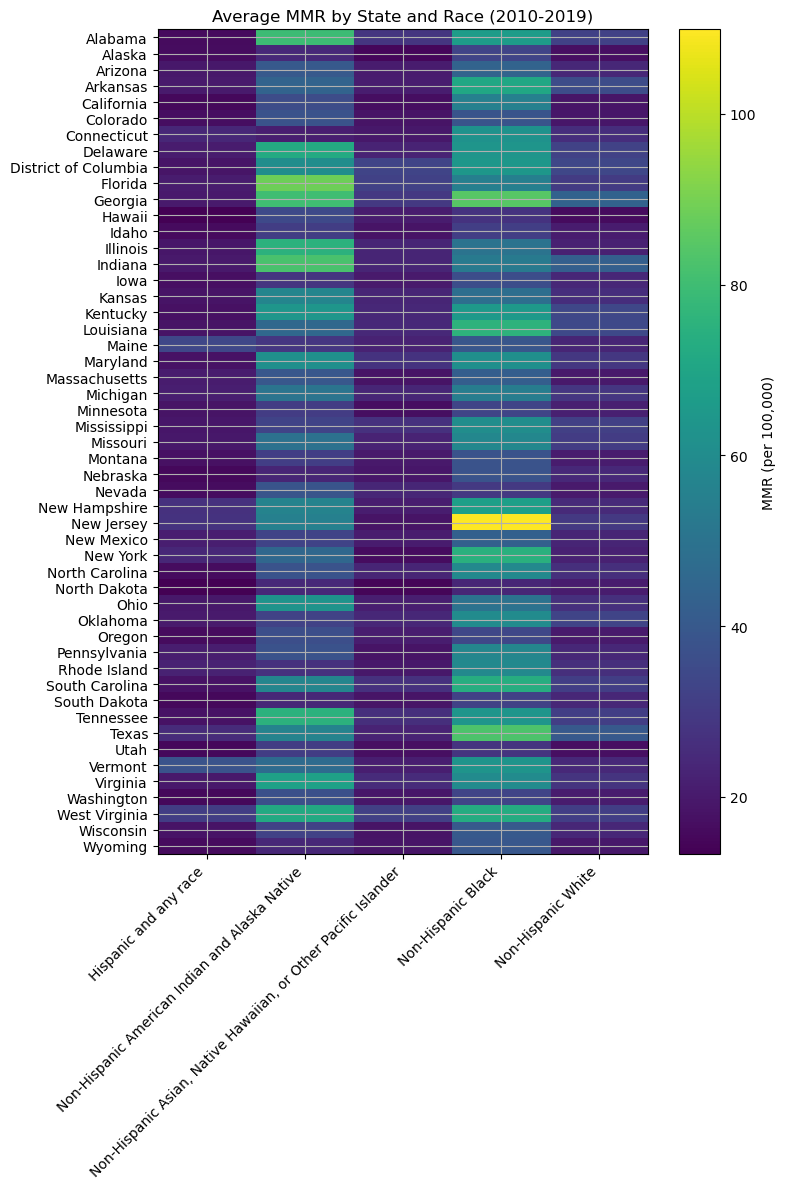

In [72]:
plt.figure(figsize=(8,12))
plt.imshow(pivot_state_race, aspect="auto")
plt.xticks(
    range(pivot_state_race.shape[1]),
    pivot_state_race.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(pivot_state_race.shape[0]),
    pivot_state_race.index
)
plt.colorbar(label="MMR (per 100,000)")
plt.title(f"Average MMR by State and Race ({latest_period})")
plt.tight_layout()
plt.show()


In [50]:
#black vs white disparity by state for 2010-2019
df_bw = ihme_latest[ihme_latest["race_group"].isin(
    ["Non-Hispanic Black", "Non-Hispanic White"]
)]

pivot_bw = (
    df_bw
    .pivot_table(index="location_name",
                 columns="race_group",
                 values="val",
                 aggfunc="mean")
    .reset_index()
    .rename(columns={
        "Non-Hispanic Black": "mmr_black",
        "Non-Hispanic White": "mmr_white"
    })
)

pivot_bw["ratio_black_white"] = pivot_bw["mmr_black"] / pivot_bw["mmr_white"]
pivot_bw["diff_black_white"]  = pivot_bw["mmr_black"] - pivot_bw["mmr_white"]

pivot_bw.sort_values("ratio_black_white", ascending=False).head()


race_group,location_name,mmr_black,mmr_white,ratio_black_white,diff_black_white
30,New Jersey,109.917798,29.475492,3.729125,80.442306
32,New York,74.555832,22.098859,3.373741,52.456972
4,California,55.391044,18.647817,2.970377,36.743226
29,New Hampshire,67.729681,24.818724,2.728975,42.910957
45,Vermont,63.152203,24.542352,2.573193,38.609851


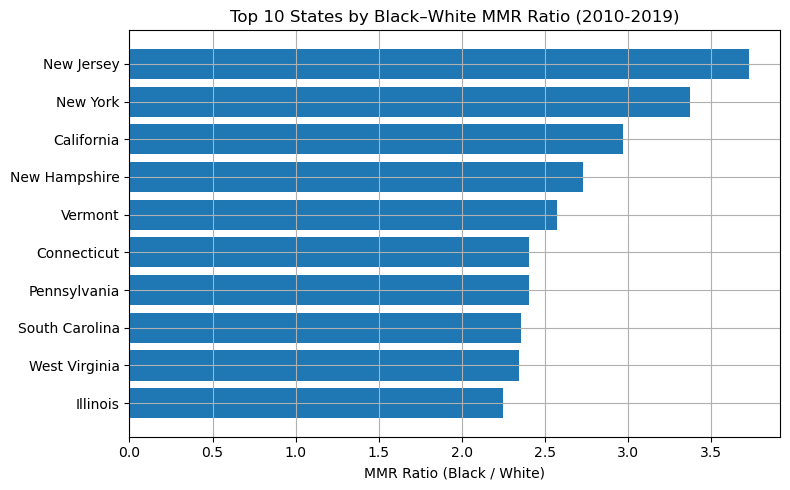

In [51]:
top10 = pivot_bw.sort_values("ratio_black_white", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top10["location_name"], top10["ratio_black_white"])
plt.gca().invert_yaxis()
plt.xlabel("MMR Ratio (Black / White)")
plt.title(f"Top 10 States by Black–White MMR Ratio ({latest_period})")
plt.tight_layout()
plt.show()


In [59]:
## global MMR vs GDP & income group
who_mmr.head()
who_mmr.columns


Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME',
       'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT',
       'RATE_PER_100000_N', 'RATE_PER_100000_NL', 'RATE_PER_100000_NU'],
      dtype='object')

In [60]:
who_mmr_clean = (
    who_mmr
    .query("IND_NAME == 'Maternal mortality ratio'")
    .rename(columns={
        "GEO_NAME_SHORT": "country",
        "DIM_TIME": "year",
        "RATE_PER_100000_N": "mmr"
    })
    [["country", "year", "mmr"]]
)

who_mmr_clean.head()


,country,year,mmr
0,Jordan,1986,92.869451
1,Kenya,1986,613.754019
2,Democratic People's Republic of Korea,1986,68.482582
3,Republic of Korea,1986,35.285310
4,Kuwait,1986,10.634715


In [63]:
gdp = pd.read_csv(gdp_path, skiprows=4)
income = pd.read_csv(income_path)

In [64]:
gdp.head()
gdp.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [ ]:
print("Income columns:", income.columns.tolist())

country_col_candidates = [c for c in income.columns if "country" in c.lower() or "economy" in c.lower() or "tablename" in c.lower()]
income_col_candidates  = [c for c in income.columns if "income" in c.lower()]

print("Country-like columns:", country_col_candidates)
print("Income-like columns:", income_col_candidates)

country_col = country_col_candidates[0]
income_col  = income_col_candidates[0]

print("Using", country_col, "as country column")
print("Using", income_col, "as income group column")

# Standardize names
income_renamed = income.rename(columns={
    country_col: "country",
    income_col: "IncomeGroup"
})

# Now merge with mmr_gdp
mmr_gdp = mmr_gdp.merge(
    income_renamed[["country", "IncomeGroup"]],
    on="country",
    how="left"
)

mmr_gdp.head()


Income columns: ['Economy', 'Code', 'Region', 'Income group', 'Lending category']
Country-like columns: ['Economy']
Income-like columns: ['Income group']
Using Economy as country column
Using Income group as income group column


,country,year,mmr,Country Name,Country Code,gdp_pc,IncomeGroup
0,Jordan,1986,92.869451,Jordan,JOR,2200.102782,Lower middle income
1,Kenya,1986,613.754019,Kenya,KEN,363.745118,Lower middle income
2,Democratic People's Republic of Korea,1986,68.482582,NaN,NaN,NaN,NaN
3,Republic of Korea,1986,35.285310,NaN,NaN,NaN,NaN
4,Kuwait,1986,10.634715,Kuwait,KWT,9076.708852,High income


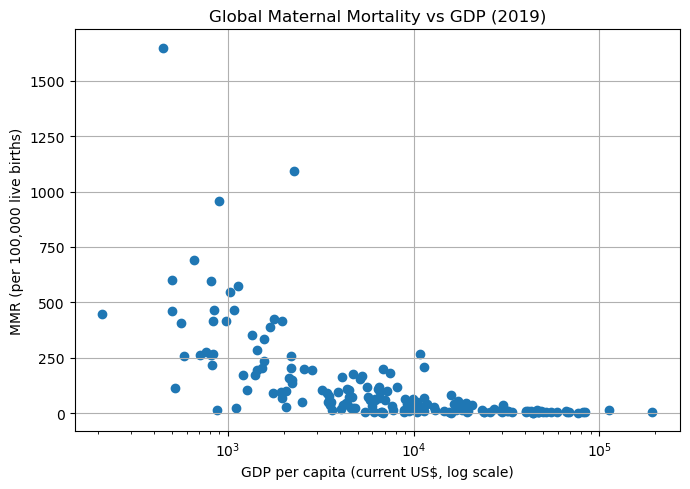

In [68]:
# GDP vs MMR scatter plot (one year)
recent_year = 2019  # change if you want another year
recent = mmr_gdp.query("year == @recent_year").copy()

# drop rows with missing GDP or MMR
recent = recent.dropna(subset=["mmr", "gdp_pc"])

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(recent["gdp_pc"], recent["mmr"])
plt.xscale("log")
plt.xlabel("GDP per capita (current US$, log scale)")
plt.ylabel("MMR (per 100,000 live births)")
plt.title(f"Global Maternal Mortality vs GDP ({recent_year})")
plt.tight_layout()
plt.show()


/var/folders/bk/7mkp0vz90ksf2fzc1gkl0wlm0000gn/T/ipykernel_18505/3557484554.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=groups, showfliers=False)


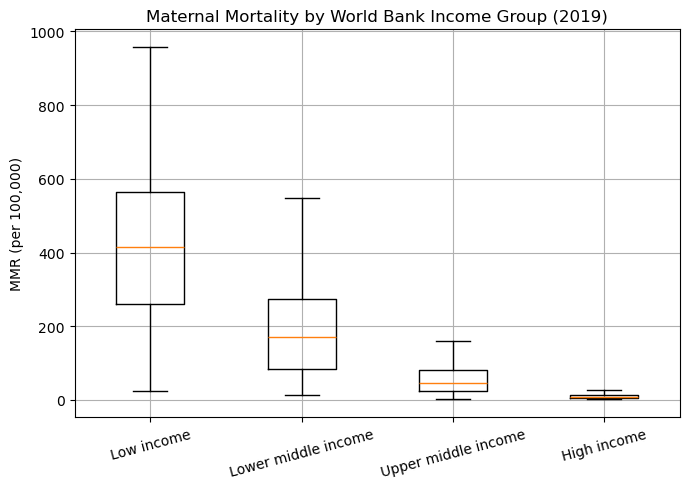

In [69]:
#boxplot by income group
groups = ["Low income", "Lower middle income", "Upper middle income", "High income"]
data = [recent.loc[recent["IncomeGroup"] == g, "mmr"].dropna() for g in groups]

plt.figure(figsize=(7,5))
plt.boxplot(data, labels=groups, showfliers=False)
plt.ylabel("MMR (per 100,000)")
plt.title(f"Maternal Mortality by World Bank Income Group ({recent_year})")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
